In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,f1_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [60]:


xt= pd.read_csv("One-Hot/MinMax/train_OH_MM_PCA35.csv").drop('LoanApproved',axis=1)
X_train=xt.iloc[:,:-1]
xte=pd.read_csv("One-Hot/MinMax/test_OH_MM_PCA35.csv").drop('LoanApproved',axis=1)
X_test=xte.iloc[:,:-1]
xv=pd.read_csv("One-Hot/MinMax/valid_OH_MM_PCA35.csv").drop('LoanApproved',axis=1)
X_valid=xv.iloc[:,:-1]
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,0.762934,0.751492,-0.074613,0.767485,-0.029619,-0.414208,-0.324383,0.080677,-0.389800,-0.175319,...,-0.105956,-0.042826,0.150586,-0.091496,-0.067835,-0.073804,-0.152986,0.007311,-0.025602,-0.056953
1,0.844867,-0.721677,-0.724746,-0.581510,-0.297437,0.224601,-0.500010,-0.164930,-0.352836,-0.148567,...,0.164432,-0.065063,-0.107219,-0.073981,-0.103678,-0.103995,0.160617,-0.089986,0.019707,-0.132486
2,-0.557122,-0.778079,-0.631166,-0.109141,-0.503381,0.010078,0.216016,-0.017383,-0.070782,0.849589,...,0.145551,0.061087,0.169863,-0.107583,-0.177864,-0.168668,0.008285,0.015598,-0.004815,-0.058379
3,0.855394,-0.504774,0.769582,-0.278825,-0.478606,-0.009859,0.765914,-0.250080,-0.309300,-0.402208,...,0.121956,0.445752,0.105585,-0.046012,-0.104457,-0.237945,0.078786,0.007164,-0.007799,0.017867
4,-0.543462,-0.720689,0.051231,-0.092494,-0.106668,-0.285384,0.206852,-0.049613,-0.105673,0.857224,...,-0.013494,-0.082246,0.129569,0.080417,-0.152715,0.112145,0.036558,0.014311,-0.036451,0.002673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.265598,-0.665066,0.043263,0.799864,0.461529,-0.591607,-0.226582,-0.388577,0.288577,-0.061632,...,-0.219659,0.032601,0.097778,-0.061041,0.119773,-0.161892,0.175159,-0.067478,0.072526,0.017814
11996,-0.603065,0.059948,-0.813341,-0.546726,0.379216,1.025875,-0.287436,-0.145607,-0.048343,-0.079915,...,0.100006,-0.038658,0.339662,0.133345,-0.163823,-0.040395,-0.009015,-0.037108,-0.024701,-0.018232
11997,0.796304,0.227888,-0.747644,-0.168019,0.182870,0.803694,1.005066,-0.061594,-0.195253,-0.310221,...,-0.044215,0.068333,-0.122508,0.069920,0.248972,0.114395,-0.052895,0.098642,-0.025087,-0.001914
11998,0.860720,-0.537566,0.738162,0.696258,-0.463690,0.189777,-0.200300,-0.343929,-0.301597,-0.090997,...,-0.038032,-0.070701,0.084283,0.135374,0.217208,-0.106894,-0.015511,-0.048184,-0.032029,-0.107258


In [61]:
y_train=xt.iloc[:,-1]
y_test=xte.iloc[:,-1]
y_valid=xv.iloc[:,-1]


In [62]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
y_train_pred = regressor.predict(X_train)
y_val_pred = regressor.predict(X_valid)
y_test_pred = regressor.predict(X_test)


In [64]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_valid, y_val_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE on Training Data: {rmse_train:.4f}")
print(f"RMSE on Validation Data: {rmse_val:.4f}")
print(f"RMSE on Test Data: {rmse_test:.4f}")

RMSE on Training Data: 0.0654
RMSE on Validation Data: 0.0660
RMSE on Test Data: 0.0662


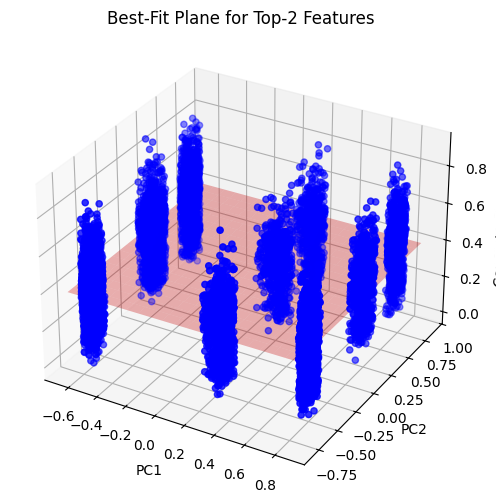

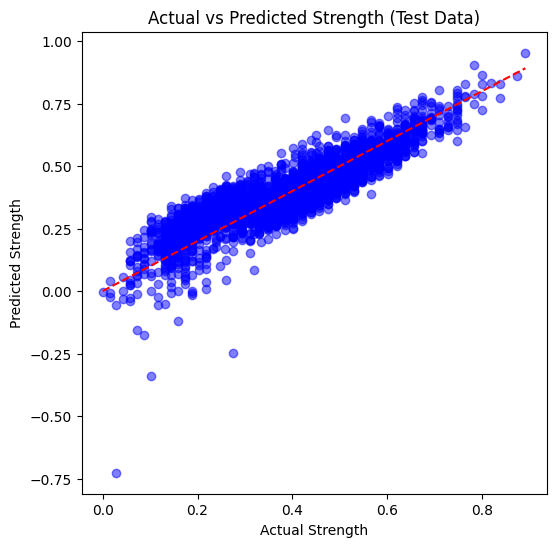

In [65]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, label="Actual", color="blue")

x_surf, y_surf = np.meshgrid(
    np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 20),
    np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 20)
)
z_surf = (regressor.intercept_ +
          regressor.coef_[0] * x_surf +
          regressor.coef_[1] * y_surf)

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, color='red')
ax.set_xlabel(X_train.columns[0])
ax.set_ylabel(X_train.columns[1])
ax.set_zlabel("Concrete Strength")
ax.set_title("Best-Fit Plane for Top-2 Features")

plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted Strength (Test Data)")
plt.show()

In [66]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print("R² score:", r2)


R² score: 0.7765333238638817
